In [2]:
# Importing the required modules
import numpy as np 
import pandas as pd 
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# generating random data for clustering 
# generating 1500 samples with centroid at [4,3],[2,-1],[-1,4]
x , y = make_blobs(n_samples = 1500, centers=[[4,3],[2,-1],[-1,4]], cluster_std = 0.5)


In [6]:
# standardising the features by putting mean to 0 and variance to 1
x = StandardScaler().fit_transform(x)

In [7]:
x

array([[-1.52607074,  1.13759239],
       [ 0.53522328, -0.96084865],
       [ 0.17335399, -1.3309955 ],
       ...,
       [ 1.17460843,  0.46856295],
       [ 0.86709075,  0.28221961],
       [ 0.14922435, -1.30482864]])

In [8]:
y

array([2, 1, 1, ..., 0, 0, 1])

In [9]:
# Applying the DBSCAN algorithm to randomly generated data 
# DBSCAN works on two parameters : Epsilon and minimumSamples
# Epsilon determines the specific radius of the dense area 
# minimumSample determine the minimum number of nieghbours we want in a particular cluster
db = DBSCAN(eps = 0.3, min_samples = 7).fit(x)


In [10]:
labels = db.labels_
labels 

array([0, 1, 1, ..., 2, 2, 1])

In [12]:
# Determining the outliers

In [14]:
core_samples = np.zeros_like(db.labels_, dtype= bool)
core_samples[db.core_sample_indices_] = True
core_samples

array([ True,  True,  True, ...,  True,  True,  True])

In [24]:
# Calculating the number of clusters in labels 
n = len(set(labels)) - (1 if -1 in labels else 0)
n

3

In [27]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

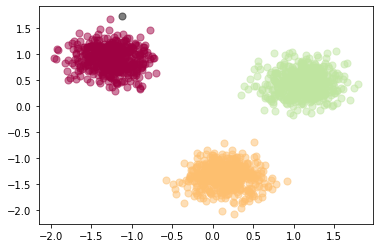

In [37]:
# Visualizing the clusters

# Creating colors for the clusters
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

for k,col in zip(unique_labels ,colors):
  if k == -1:
    #Black used for noise 
    col = 'k'
  
  class_member_check = (labels == k)

  # plotting the data points that are clustered 
  xy = x[class_member_check & core_samples]
  plt.scatter(xy[:,0], xy[:,1] , s=50, c = [col], alpha = 0.5 )


  # plotting the outliers
  xy = x[class_member_check & ~core_samples]
  plt.scatter(xy[:,0],xy[:,1],s=50, c= [col], alpha =0.5)
plt.show()